In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [3]:
measure.mutual_information_of_every_pair(DM.n_thermal_qbits([.5,.3,.1]))

C:\Users\jacks\Documents\GitHub\Qnibble\Notebooks\..\src\density_matrix.py:280: Warning: Requires conversion to and from dense
  warnings.warn("Requires conversion to and from dense", Warning)


[(0.0, 0, 1), (0.0, 0, 2), (2.220446049250313e-16, 1, 2)]

In [4]:
N = 8
num_chunks = 2
num_iterations = 50
measurments = [measure.mutual_information_of_every_pair]
measurments = [measure.relative_entropy_of_every_pair]

initial_pops = [.2 for _ in range(N)]
initial_pops[4] = .4


In [6]:
system = DM.n_thermal_qbits(initial_pops)
ordering = orders.n_random_gas_orders(N,n = num_iterations,chunk_sizes =[4,4])
data = sim.run(system,
                          measurement_set = measurments,
                          num_iterations = num_iterations,
                          orders = ordering
                          );

using random unitaries


C:\Users\jacks\AppData\Local\Temp\ipykernel_38136\1999327367.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(ind,figsize=(3,3))


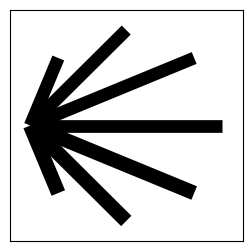

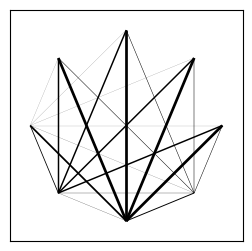

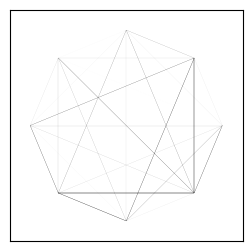

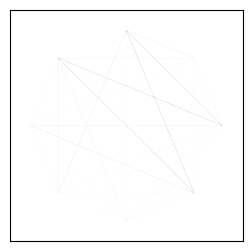

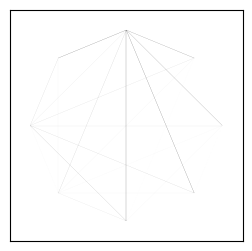

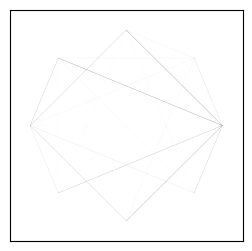

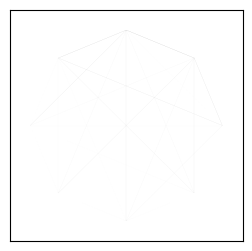

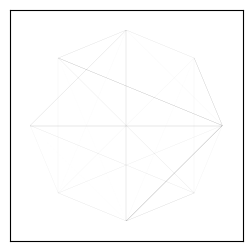

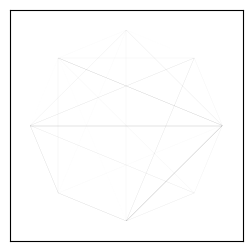

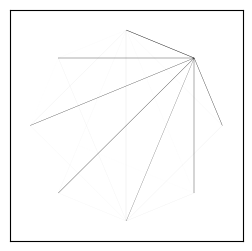

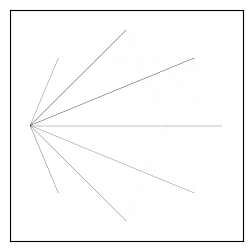

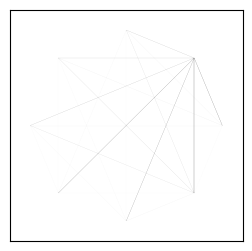

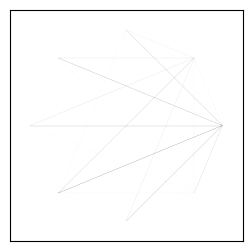

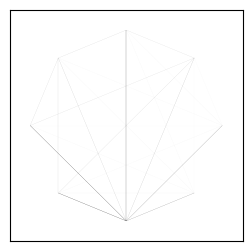

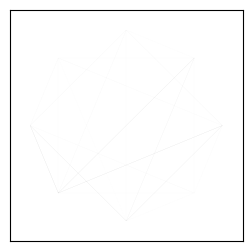

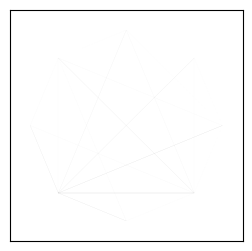

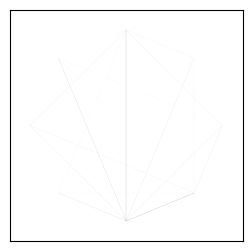

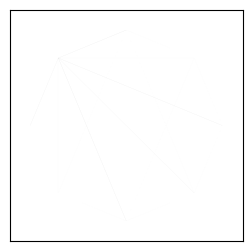

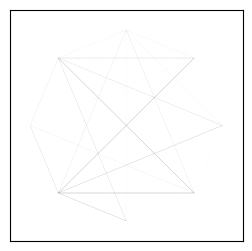

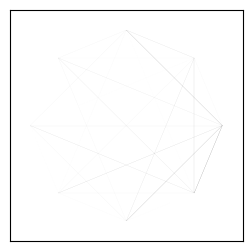

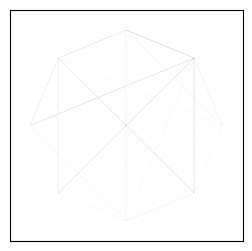

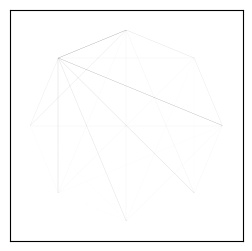

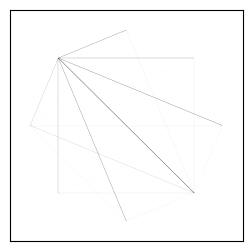

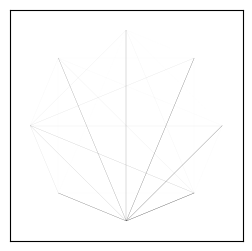

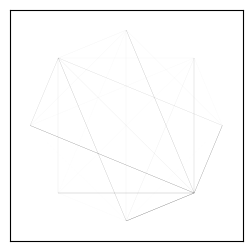

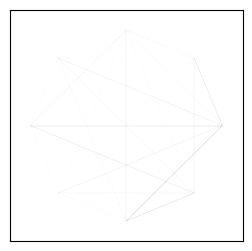

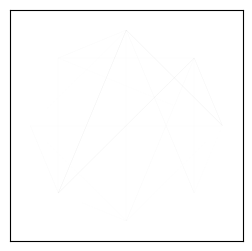

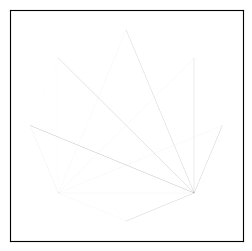

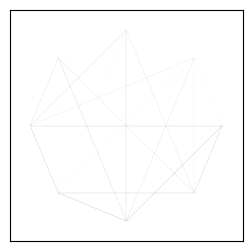

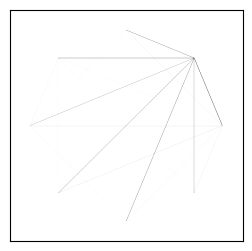

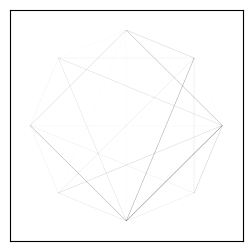

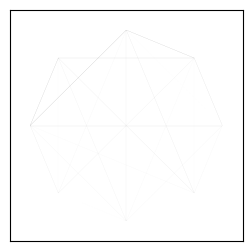

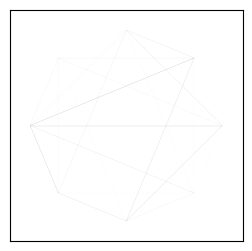

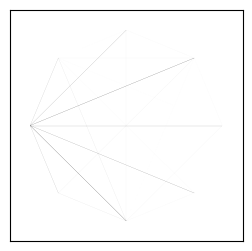

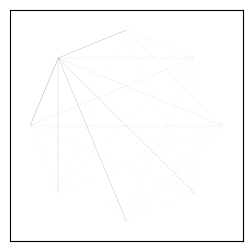

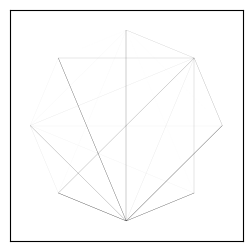

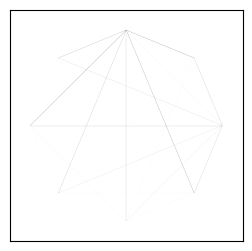

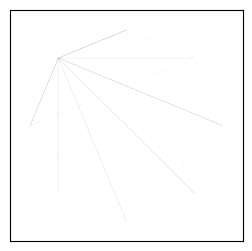

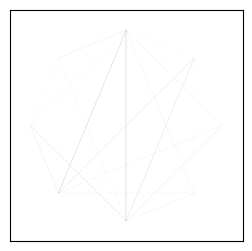

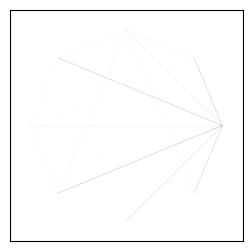

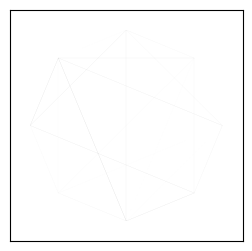

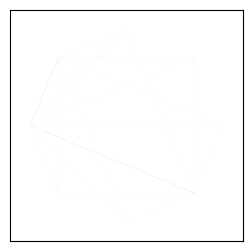

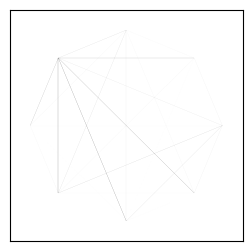

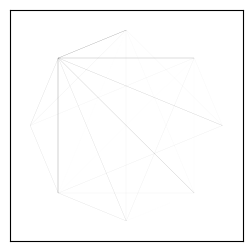

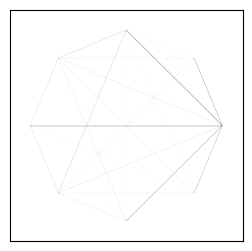

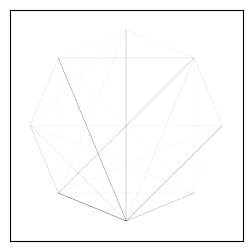

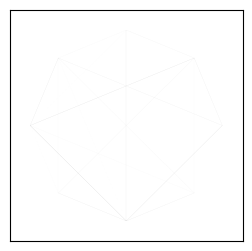

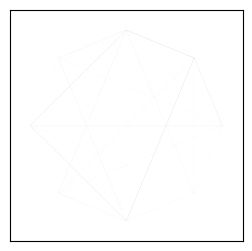

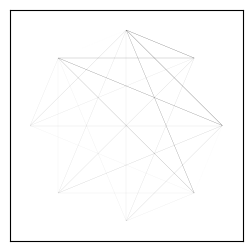

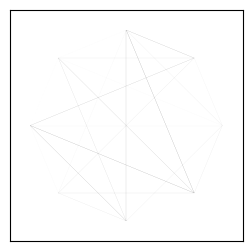

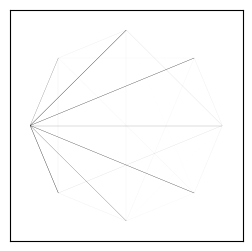

In [10]:
import networkx as nx
g = nx.Graph()

number = 0
for ind in range(0,1428,28):
    for RE,i,j in data[0][0][ind:ind+28]:
        width = 100*np.real(RE)
        # print(width)
        g.add_edge(i,j, weight=width)
    plt.figure(ind,figsize=(3,3))
    pos = nx.circular_layout(g)
    # nx.draw_networkx(g, pos)

    for edge in g.edges(data='weight'):
        nx.draw_networkx_edges(g, pos, edgelist=[edge], width=edge[2])
    plt.savefig(f"{str(number).zfill(3)}migraph.png")
    number+=1